In [1]:
import pandas as pd
from pandas import DataFrame, Series
%load_ext autoreload

%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append("../../")
from genesis.entities.Symbol import Symbol
from genesis.entities.CollectionSymbol import CollectionSymbol


In [4]:
collection = CollectionSymbol()

In [5]:
df = DataFrame(
    [{
        "ticker": "PETR4", 
        "name": "SUPER PETRO", 
        "exchange": "NYSE"
    },{
        "ticker": "BBAS3", 
        "name": "SUPER PETRO", 
        "exchange": "NYSE"
    },
    ], 
    index=[0, 1]
)

collection.add_from_df(df)





,exchange,name,ticker
0,NYSE,SUPER PETRO,PETR4
1,NYSE,SUPER PETRO,BBAS3


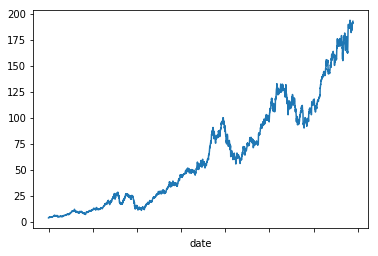

In [73]:
import redis
redisConn = redis.StrictRedis(host="localhost", port=6379, db=0)

df = pd.read_msgpack(redisConn.get("AAPL"))

df.close.plot()

In [29]:
from genesis.market_data.market_data import YCharts
from genesis.conf import settings 
import logging
import traceback

logger = logging.getLogger(__name__)

mk_data = YCharts(settings.YCHART_API, logger)


In [49]:
from genesis.market_data.market_data import YCharts
from datetime import datetime
mk_data = YCharts(settings.YCHART_API, logger)
from genesis.persistence.CollectionSymbolPersistence import CollectionSymbolPersistence
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
symbols = CollectionSymbolPersistence.get()

date_before = datetime.now()

df = DataFrame()
for symbols_list in list(chunks([i for i in symbols.get_tickers()], 100)):
    data = mk_data.get_metrics_from_points(symbols_list, metrics=["price", "volume"])
    if df is None:
        df = data
    else:
        df = df.append(data, sort=False)

print("elapsed_time_total {}".format(datetime.now() - date_before)) 




['A', 'AA', 'AAC', 'AAN', 'AAP', 'AAT', 'AAV', 'AB', 'ABB', 'ABBV', 'ABC', 'ABEV', 'ABG', 'ABM', 'ABR', 'ABT', 'ABX', 'AC', 'ACC', 'ACCO', 'ACH', 'ACM', 'ACN', 'ACP', 'ACRE', 'ACV', 'ADC', 'ADIN', 'ADM', 'ADNT', 'ADS', 'ADSW', 'ADT', 'ADX', 'AEE', 'AEG', 'AEL', 'AEM', 'AEO', 'AEP', 'AER', 'AES', 'AET', 'AFB', 'AFG', 'AFI', 'AFL', 'AFT', 'AG', 'AGC', 'AGCO', 'AGD', 'AGI', 'AGM', 'AGMA', 'AGN', 'AGO', 'AGR', 'AGRO', 'AGS', 'AGX', 'AHC', 'AHH', 'AHL', 'AHT', 'AI', 'AIF', 'AIG', 'AIN', 'AIR', 'AIT', 'AIV', 'AIZ', 'AJG', 'AJRD', 'AJX', 'AKO.A', 'AKO.B', 'AKP', 'AKR', 'AKS', 'AL', 'ALB', 'ALE', 'ALEX', 'ALG', 'ALK', 'ALL', 'ALLE', 'ALLY', 'ALSN', 'ALV', 'ALX', 'AM', 'AMBR', 'AMC', 'AME', 'AMG', 'AMGP', 'AMH']
['A', 'AA', 'AAC', 'AAN', 'AAP', 'AAT', 'AAV', 'AB', 'ABB', 'ABBV', 'ABC', 'ABEV', 'ABG', 'ABM', 'ABR', 'ABT', 'ABX', 'AC', 'ACC', 'ACCO', 'ACH', 'ACM', 'ACN', 'ACP', 'ACRE', 'ACV', 'ADC', 'ADIN', 'ADM', 'ADNT', 'ADS', 'ADSW', 'ADT', 'ADX', 'AEE', 'AEG', 'AEL', 'AEM', 'AEO', 'AEP', 'AER

['HOV', 'HP', 'HPE', 'HPF', 'HPI', 'HPP', 'HPQ', 'HPR', 'HPS', 'HQH', 'HQL', 'HR', 'HRB', 'HRC', 'HRI', 'HRL', 'HRS', 'HRTG', 'HSBC', 'HSC', 'HST', 'HSY', 'HT', 'HTA', 'HTD', 'HTGC', 'HTH', 'HTY', 'HTZ', 'HUBB', 'HUBS', 'HUD', 'HUM', 'HUN', 'HUYA', 'HVT', 'HVT.A', 'HXL', 'HY', 'HYB', 'HYI', 'HYT', 'HZN', 'HZO', 'I', 'IAE', 'IAG', 'IBA', 'IBM', 'IBN', 'IBP', 'ICD', 'ICE', 'ICL', 'IDA', 'IDE', 'IDT', 'IEX', 'IFF', 'IFN', 'IGA', 'IGD', 'IGI', 'IGR', 'IGT', 'IHC', 'IHD', 'IHG', 'IHIT', 'IHTA', 'IID', 'IIF', 'IIM', 'IIPR', 'IMAX', 'INB', 'INF', 'INFY', 'ING', 'INGR', 'INN', 'INSI', 'INSP', 'INST', 'INSW', 'INT', 'INVH', 'INXN', 'IO', 'IP', 'IPG', 'IPHI', 'IPI', 'IPOA', 'IQI', 'IQV', 'IR', 'IRET', 'IRL', 'IRM']
['IRR', 'IRS', 'IRT', 'ISD', 'IT', 'ITCB', 'ITG', 'ITGR', 'ITT', 'ITUB', 'ITW', 'IVC', 'IVH', 'IVR', 'IVZ', 'IX', 'JAG', 'JAX', 'JBGS', 'JBL', 'JBT', 'JCAP', 'JCE', 'JCI', 'JCO', 'JCP', 'JDD', 'JE', 'JEC', 'JEF', 'JELD', 'JEMD', 'JEQ', 'JFR', 'JGH', 'JHA', 'JHB', 'JHD', 'JHG', 'JHI', 

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


['SAN', 'SAP', 'SAR', 'SAVE', 'SB', 'SBGL', 'SBH', 'SBI', 'SBOW', 'SBR', 'SBS', 'SC', 'SCCO', 'SCD', 'SCG', 'SCHW', 'SCI', 'SCL', 'SCM', 'SCS', 'SCX', 'SD', 'SDLP', 'SDR', 'SDRL', 'SDT', 'SE', 'SEAS', 'SEE', 'SEM', 'SEMG', 'SEND', 'SEP', 'SERV', 'SF', 'SFE', 'SFL', 'SFS', 'SFUN', 'SGU', 'SHAK', 'SHG', 'SHI', 'SHLX', 'SHO', 'SHOP', 'SHW', 'SID', 'SIG', 'SITE', 'SIX', 'SJI', 'SJM', 'SJR', 'SJT', 'SJW', 'SKM', 'SKT', 'SKX', 'SKY', 'SLB', 'SLCA', 'SLD', 'SLF', 'SLG', 'SM', 'SMAR', 'SMFG', 'SMG', 'SMHI', 'SMI', 'SMLP', 'SMM', 'SMP', 'SMTA', 'SN', 'SNA', 'SNAP', 'SNDR', 'SNE', 'SNN', 'SNP', 'SNR', 'SNV', 'SNX', 'SNY', 'SO', 'SOGO', 'SOI', 'SOL', 'SON', 'SOR', 'SPA', 'SPB', 'SPE', 'SPG', 'SPGI', 'SPH', 'SPLP', 'SPN']
['SPOT', 'SPR', 'SPXC', 'SPXX', 'SQ', 'SQM', 'SQNS', 'SR', 'SRC', 'SRE', 'SRF', 'SRG', 'SRI', 'SRLP', 'SRT', 'SRV', 'SSD', 'SSI', 'SSL', 'SSTK', 'SSW', 'ST', 'STAG', 'STAR', 'STC', 'STE', 'STG', 'STI', 'STK', 'STL', 'STM', 'STN', 'STNG', 'STON', 'STOR', 'STT', 'STWD', 'STZ', 'STZ

['CEY', 'CEZ', 'CFA', 'CFBI', 'CFBK', 'CFFI', 'CFFN', 'CFMS', 'CFO', 'CFRX', 'CG', 'CGBD', 'CGEN', 'CGIX', 'CGNX', 'CGO', 'CGVIC', 'CHCI', 'CHCO', 'CHDN', 'CHEF', 'CHEK', 'CHFC', 'CHFN', 'CHFS', 'CHI', 'CHKE', 'CHKP', 'CHMA', 'CHMG', 'CHNR', 'CHRS', 'CHRW', 'CHTR', 'CHUY', 'CHW', 'CHY', 'CIBR', 'CID', 'CIDM', 'CIFS', 'CIGI', 'CIL', 'CINF', 'CIU', 'CIVB', 'CIVEC', 'CIZ', 'CIZN', 'CJJD', 'CKPT', 'CLAR', 'CLBK', 'CLBS', 'CLCT', 'CLDC', 'CLDX', 'CLFD', 'CLGN', 'CLIR', 'CLLS', 'CLMT', 'CLNE', 'CLPS', 'CLRB', 'CLRG', 'CLRO', 'CLSD', 'CLSN', 'CLUB', 'CLVS', 'CLWT', 'CLXT', 'CMCO', 'CMCSA', 'CMCT', 'CME', 'CMFN', 'CMPR', 'CMRX', 'CMSS', 'CMTA', 'CMTL', 'CNAC', 'CNAT', 'CNBKA', 'CNCE', 'CNCR', 'CNET', 'CNFR', 'CNMD', 'CNOB', 'CNSL', 'CNST', 'CNTF', 'CNTY', 'CNXN', 'COBZ', 'COCP', 'CODA']
['CODX', 'COHR', 'COHU', 'COKE', 'COLB', 'COLL', 'COLM', 'COMM', 'COMT', 'CONE', 'CONN', 'COOL', 'CORE', 'CORI', 'CORT', 'CORV', 'COST', 'COUP', 'COWN', 'CPAH', 'CPHC', 'CPIX', 'CPLA', 'CPLP', 'CPRT', 'CPRX', '

['LAUR', 'LAWS', 'LAZY', 'LBAI', 'LBC', 'LBIX', 'LBRDA', 'LBRDK', 'LBTYA', 'LBTYB', 'LBTYK', 'LCA', 'LCNB', 'LCUT', 'LDRI', 'LE', 'LECO', 'LEDS', 'LEGR', 'LENS', 'LEVL', 'LEXEA', 'LEXEB', 'LFAC', 'LFUS', 'LFVN', 'LGCY', 'LGIH', 'LGND', 'LHCG', 'LIFE', 'LILA', 'LILAK', 'LINC', 'LIND', 'LINK', 'LION', 'LITE', 'LIVE', 'LIVN', 'LIVX', 'LJPC', 'LKFN', 'LKOR', 'LKQ', 'LLIT', 'LLNW', 'LMAT', 'LMB', 'LMBS', 'LMFA', 'LMNR', 'LMNX', 'LMRK', 'LMST', 'LNDC', 'LNGR', 'LNTH', 'LOAN', 'LOB', 'LOCO', 'LOGI', 'LOGM', 'LONE', 'LOOP', 'LOPE', 'LORL', 'LOVE', 'LOXO', 'LPCN', 'LPLA', 'LPNT', 'LPSN', 'LPTH', 'LPTX', 'LQDA', 'LQDT', 'LRAD', 'LRCX', 'LRGE', 'LSBK', 'LSCC', 'LSTR', 'LSXMA', 'LSXMB', 'LSXMK', 'LTBR', 'LTRPA', 'LTRPB', 'LTRX', 'LTXB', 'LULU', 'LUNA', 'LVHD', 'LWAY', 'LX', 'LXRX', 'LYL', 'LYTS', 'MACK']
['MACQ', 'MAGS', 'MAMS', 'MANH', 'MANT', 'MAR', 'MARA', 'MARK', 'MARPS', 'MASI', 'MAT', 'MATR', 'MATW', 'MAYS', 'MB', 'MBB', 'MBCN', 'MBFI', 'MBII', 'MBIN', 'MBIO', 'MBOT', 'MBRX', 'MBSD', 'MBTF',

['TGEN', 'TGLS', 'TGTX', 'THFF', 'THRM', 'THST', 'TIBR', 'TIG', 'TILE', 'TIPT', 'TISA', 'TITN', 'TIVO', 'TLF', 'TLGT', 'TLND', 'TLRY', 'TLT', 'TMCX', 'TMDI', 'TMSR', 'TMUS', 'TNAV', 'TNDM', 'TNXP', 'TOCA', 'TOPS', 'TORC', 'TOUR', 'TOWN', 'TPIC', 'TPIV', 'TQQQ', 'TRCB', 'TRCH', 'TREE', 'TRHC', 'TRIB', 'TRIL', 'TRIP', 'TRMB', 'TRMD', 'TRMK', 'TRMT', 'TRNC', 'TRNS', 'TROV', 'TROW', 'TRPX', 'TRS', 'TRST', 'TRUE', 'TRUP', 'TRVG', 'TRVN', 'TSBK', 'TSC', 'TSCAP', 'TSCO', 'TSEM', 'TSG', 'TSLA', 'TSRI', 'TSRO', 'TST', 'TTD', 'TTEC', 'TTEK', 'TTGT', 'TTMI', 'TTNP', 'TTOO', 'TTPH', 'TTS', 'TTWO', 'TUES', 'TUR', 'TURN', 'TUSA', 'TUSK', 'TVIX', 'TVIZ', 'TVTY', 'TWIN', 'TWLV', 'TWMC', 'TWNK', 'TWOU', 'TXMD', 'TXN', 'TXRH', 'TYHT', 'TYME', 'TYPE', 'TZOO', 'UAE', 'UBCP', 'UBFO', 'UBIO', 'UBNK']
['UBNT', 'UBOH', 'UBSH', 'UBSI', 'UBX', 'UCBA', 'UCBI', 'UCFC', 'UCTT', 'UDBI', 'UEIC', 'UEPS', 'UFCS', 'UFPI', 'UFPT', 'UG', 'UGLD', 'UHAL', 'UIHC', 'ULBI', 'ULH', 'ULTA', 'ULTI', 'UMBF', 'UMPQ', 'UMRX', 'UNAM

['ILTB', 'IMLP', 'IMTB', 'IMTM', 'INCO', 'INDL', 'INDS', 'INKM', 'INR', 'INTF', 'INXX', 'IOO', 'IPAC', 'IPAY', 'IPE', 'IPO', 'IPOS', 'IQDE', 'IQDF', 'IQDY', 'IQLT', 'IRBO', 'ISCF', 'ISMD', 'ISRA', 'ISZE', 'ITE', 'ITEQ', 'ITM', 'ITOT', 'IVE', 'IVLU', 'IVOG', 'IVOO', 'IVOV', 'IVV', 'IVW', 'IWB', 'IWC', 'IWD', 'IWF', 'IWL', 'IWM', 'IWN', 'IWO', 'IWP', 'IWR', 'IWS', 'IWV', 'IWX', 'IWY', 'IXC', 'IXG', 'IXJ', 'IXN', 'IXP', 'IYC', 'IYE', 'IYF', 'IYG', 'IYH', 'IYK', 'IYM', 'IYR', 'IYW', 'IYY', 'JDIV', 'JDST', 'JEM', 'JETS', 'JHDG', 'JHMA', 'JHMC', 'JHMD', 'JHME', 'JHMF', 'JHMH', 'JHMI', 'JHML', 'JHMM', 'JHMS', 'JHMT', 'JHMU', 'JHSC', 'JJAB', 'JJCB', 'JJE', 'JJEB', 'JJGB', 'JJM', 'JJMB', 'JJP', 'JJPB', 'JJS', 'JJSB', 'JJT', 'JJTB', 'JJU', 'JJUB', 'JKD']
['JKE', 'JKF', 'JKG', 'JKH', 'JKJ', 'JKK', 'JKL', 'JMIN', 'JMOM', 'JNK', 'JNUG', 'JPED', 'JPEH', 'JPEM', 'JPEU', 'JPGE', 'JPHF', 'JPIH', 'JPIN', 'JPLS', 'JPMB', 'JPME', 'JPMF', 'JPMV', 'JPN', 'JPNL', 'JPSE', 'JPUS', 'JPXN', 'JQUA', 'JUST', 'JVAL

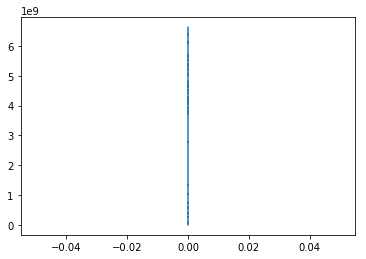

In [54]:
#df.info()
df.volume.cumsum().plot()

In [ ]:
stock_list = ["RMP"]
metrics = ["price", "volume"]
stock_data = mk_data.company_client.get_points(stock_list, metrics)

points_df = DataFrame()
for symbol in list(stock_data["response"].keys()):
    data_dict = {
        "symbol": symbol,
    }
    # download metrics
    for metric in metrics:
        extracted_data = stock_data["response"][str(symbol)]["results"][str(metric)]["data"]
        add_dict = {
            "date" : extracted_data[0],
            metric : extracted_data[1]
        }
        data_dict.update(add_dict)
    dataframe = DataFrame(dict(data_dict), index=[0])
    points_df = points_df.append(dataframe)
points_df.tail()

In [27]:
stock_data


{'response': {'RMP': {'meta': {'error_code': 404,
    'status': 'error',
    'error_message': 'Symbol Not Found.'}}},
 'meta': {'status': 'ok',
  'url': 'http://ycharts.com/api/v3/companies/RMP/points/price,volume'}}

In [25]:
def parse_results(results_data, metrics = ["price"]):
    for symbol in list(stock_data["response"].keys()):
        data_dict = {
            "symbol": symbol,
        }
        print(results_data["response"])
        
        # download metrics
        for metric in metrics:
            extracted_data = stock_data["response"][str(symbol)]["results"][str(metric)]["data"]
            add_dict = {
                "date" : extracted_data[0],
                metric : extracted_data[1]
            }
            data_dict.update(add_dict)

results_data

NameError: name 'results_data' is not defined

In [6]:
import redis


df = pd.read_csv("big_csv.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,date,open,high,low,close,volume,ticker
0,0,0,2010-07-21,25.10,25.10,24.70,24.70,41999.0,AADR
1,1,1,2010-07-22,25.42,25.42,25.13,25.26,17480.0,AADR
2,2,2,2010-07-23,25.54,25.54,25.08,25.28,8625.0,AADR
3,3,3,2010-07-26,25.40,25.40,25.22,25.37,18850.0,AADR
4,4,4,2010-07-27,25.25,25.29,25.20,25.29,8200.0,AADR
